# Recommendation System
Lorenzo Antolini, Simone Lu, Enrico Romano, Luca Schisano


- Exploratory Data Analysis for recommendation
- Recommendation Systems 

https://www.kaggle.com/code/jenia2021/recommendation-systems-for-amazon-products


In order to help the user to find out information about the product , recommedation systems where developed.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import joblib
import scipy.sparse
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# assign dataset names
list_of_names = ['01.geo','02.customers','03.sellers','04.order_status','05.order_items',
                '06.order_payments','07.product_reviews','08.products']
  
# create empty list
df = []
  
# append datasets into the list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv (list_of_names [i] + ".csv", encoding="ISO-8859-1",delimiter = ";")
    df.append(temp_df)
    

In [3]:
geoloc =df[0] 
customers =df[1] 
sellers =df[2]  
orders =df[3]  
order_items =df[4]
order_payments =df[5]
order_reviews =df[6]
products =df[7]

In [5]:
df_orders=pd.merge(orders,customers,on='customer_id')

In [6]:
merged=pd.merge(df_orders,order_reviews,on='order_id')

In [7]:
df_final=pd.merge(merged,products,on='product_id')

In [8]:
df_final.head()

,order_id,customer_id,order_status,ts_order_purchase,ts_order_approved,ts_order_delivered_carrier,ts_order_delivered_customer,ts_order_estimated_delivery,customer_unique_id,customer_autonomous_community,customer_city,product_id,review_score,review_date,product_category_name,product_weight_gr,product_length_cm,product_height_cm,product_width_cm,product_photo_quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2018 10:56,02/10/2018 11:07,04/10/2018 19:55,10/10/2018 21:25,18/10/2018 00:00,7c396fd4830fd04220f754e42b4e5bff,Comunidad de Madrid,Madrid,87285b34884572647811a353c7ac498a,5,12/10/2018 03:43,home accessories,500.0,19.0,8.0,13.0,4.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,15/08/2018 18:29,15/08/2018 20:05,17/08/2018 15:28,18/08/2018 14:44,28/08/2018 00:00,3a51803cc0d012c3b5dc8b7528cb05f7,Comunidad de Madrid,Madrid,87285b34884572647811a353c7ac498a,5,20/08/2018 15:16,home accessories,500.0,19.0,8.0,13.0,4.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,02/08/2018 18:24,02/08/2018 18:43,04/08/2018 17:35,07/08/2018 18:30,15/08/2018 00:00,ef0996a1a279c26e7ecbd737be23d235,Comunidad de Madrid,Madrid,87285b34884572647811a353c7ac498a,1,08/08/2018 23:26,home accessories,500.0,19.0,8.0,13.0,4.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,23/10/2018 23:26,25/10/2018 02:14,27/10/2018 16:48,07/11/2018 18:04,13/11/2018 00:00,e781fdcc107d13d865fc7698711cc572,Castilla y León,Valladolid,87285b34884572647811a353c7ac498a,5,10/11/2018 19:52,home accessories,500.0,19.0,8.0,13.0,4.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2019 20:41,26/07/2019 03:24,26/07/2019 14:31,07/08/2019 15:27,13/08/2019 00:00,af07308b275d755c9edb36a90c618231,País Vasco,Bilbao,595fac2a385ac33a80bd5114aec74eb8,5,08/08/2019 18:37,fragrance,400.0,19.0,13.0,19.0,1.0


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100802 entries, 0 to 100801
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100802 non-null  object 
 1   customer_id                    100802 non-null  object 
 2   order_status                   100802 non-null  object 
 3   ts_order_purchase              100802 non-null  object 
 4   ts_order_approved              100788 non-null  object 
 5   ts_order_delivered_carrier     99805 non-null   object 
 6   ts_order_delivered_customer    98699 non-null   object 
 7   ts_order_estimated_delivery    100802 non-null  object 
 8   customer_unique_id             100802 non-null  object 
 9   customer_autonomous_community  100802 non-null  object 
 10  customer_city                  100802 non-null  object 
 11  product_id                     100802 non-null  object 
 12  review_score                  

In [10]:
df_rs=df_final[['customer_id','product_id','review_score']]

In [11]:
df_rs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100802 entries, 0 to 100801
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   100802 non-null  object
 1   product_id    100802 non-null  object
 2   review_score  100802 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [12]:
print("Total Reviews:",df_rs.shape[0])
print("Total Columns:",df_rs.shape[1])

Total Reviews: 100802
Total Columns: 3


In [14]:
print("Total number of ratings :",df_rs.review_score.nunique())
print("Total number of users   :", df_rs.customer_id.nunique())
print("Total number of products  :", df_rs.product_id.nunique())

Total number of ratings : 5
Total number of users   : 97150
Total number of products  : 32541


In [15]:
# Check Duplicate data
df_rs[df_rs.duplicated()].any()

customer_id     False
product_id      False
review_score    False
dtype: bool

In [16]:
# Average rating of products
ratings = pd.DataFrame(df_rs.groupby('product_id')['review_score'].mean())
ratings['ratings_count'] = pd.DataFrame(df_rs.groupby('product_id')['review_score'].count())
ratings['ratings_average'] = pd.DataFrame(df_rs.groupby('product_id')['review_score'].mean())
ratings.head(10)

,review_score,ratings_count,ratings_average
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,5.000000,1,5.000000
00088930e925c41fd95ebfe695fd2655,5.000000,1,5.000000
0009406fd7479715e4bef61dd91f2462,5.000000,1,5.000000
000b8f95fcb9e0096488278317764d19,4.500000,2,4.500000
000d9be29b5207b54e86aa1b1ac54872,3.000000,1,3.000000
0011c512eb256aa0dbbb544d8dffcf6e,4.000000,1,4.000000
00126f27c813603687e6ce486d909d01,5.000000,2,5.000000
001795ec6f1b187d37335e1c4704762e,4.714286,7,4.714286
001b237c0e9bb435f2e54071129237e9,5.000000,1,5.000000


<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

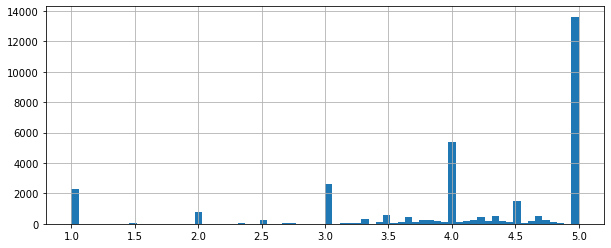

In [19]:
plt.figure(figsize=(10,4))
ratings['review_score'].hist(bins=70)

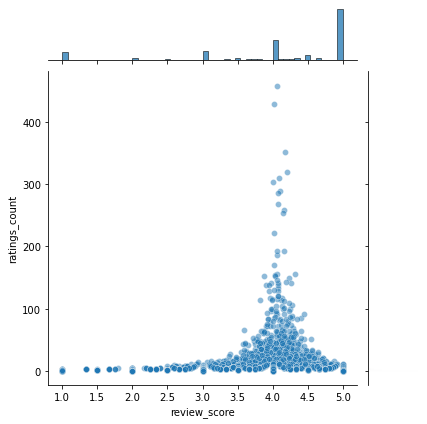

In [22]:
sns.jointplot(x='review_score',y='ratings_count',data=ratings,alpha=0.5)

<AxesSubplot:xlabel='product_id'>

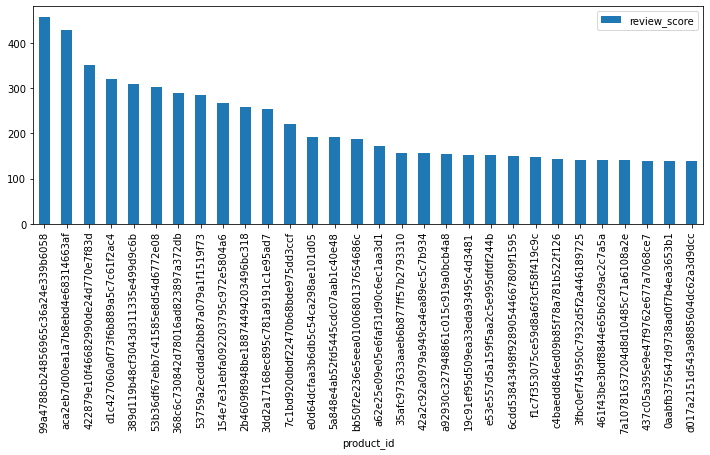

In [23]:
# Most top 30 products
popular_products = pd.DataFrame(df_rs.groupby('product_id')['review_score'].count())
most_popular = popular_products.sort_values('review_score', ascending=False)
most_popular.head(30).plot(kind = "bar",figsize=(12, 4))

In [24]:
reviews=df_rs.iloc[:,[0,1,2]]
reviews.head()
reviews.to_excel('reviews.xlsx')

,customer_id,product_id,review_score
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,5
1,a20e8105f23924cd00833fd87daa0831,87285b34884572647811a353c7ac498a,5
2,26c7ac168e1433912a51b924fbd34d34,87285b34884572647811a353c7ac498a,1
3,53904ddbea91e1e92b2b3f1d09a7af86,87285b34884572647811a353c7ac498a,5
4,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,5


In [25]:
reviews.describe()['review_score'].T

count    100802.000000
mean          4.087002
std           1.346885
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

In [26]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = reviews.groupby(by='customer_id')['review_score'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

customer_id
0d861a5e4dd6a9079d89e1330848f0ab    8
1205480caca6c37f55954da838933b8a    7
30bb84b541c96af98ba7d90b9ebf35d0    7
be1c4e52bb71e0c54b11a26b8e8d59f2    6
5e312b0d9bf5c91599eb42120e633b19    6
Name: review_score, dtype: int64

In [27]:
no_of_rated_products_per_user.describe()

count    97150.000000
mean         1.037591
std          0.224509
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: review_score, dtype: float64

In [28]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

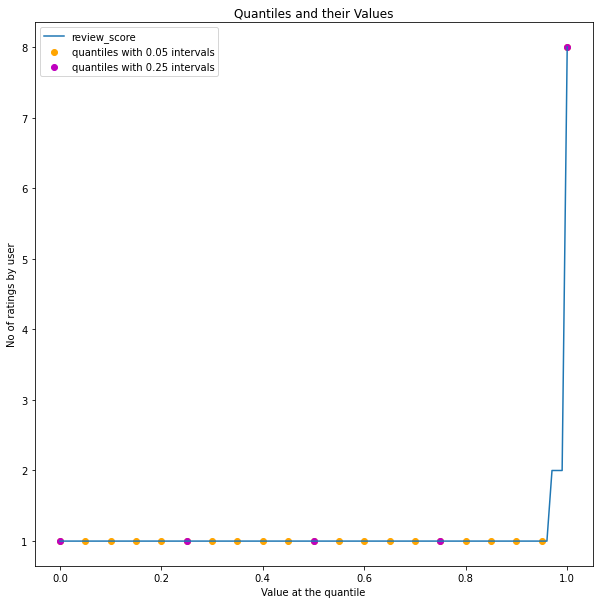

In [29]:
_=plt.figure(figsize=(10,10))
_=plt.title("Quantiles and their Values")
_=quantiles.plot()
# quantiles with 0.05 difference
_=plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
_=plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
_=plt.ylabel('No of ratings by user')
_=plt.xlabel('Value at the quantile')
_=plt.legend(loc='best')
_=plt.show()

In [30]:
print('\n No of rated product more than 2 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 2)) )


 No of rated product more than 2 per user : 3148



In [31]:
#Getting the new dataframe which contains users who has given 3 or more ratings

new_df=reviews.groupby("product_id").filter(lambda x:x['review_score'].count() >=3)

In [32]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['review_score'].mean())



ratings_mean_count['review_counts'] = pd.DataFrame(new_df.groupby('product_id')['review_score'].count())

In [33]:
ratings_mean_count.head()

,review_score,review_counts
product_id,,
001795ec6f1b187d37335e1c4704762e,4.714286,7
001b72dfd63e9833e8c02742adf472e3,4.416667,12
00210e41887c2a8ef9f791ebc780cc36,4.400000,5
002159fe700ed3521f46cfcf6e941c76,3.285714,7
00250175f79f584c14ab5cecd80553cd,3.571429,7


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

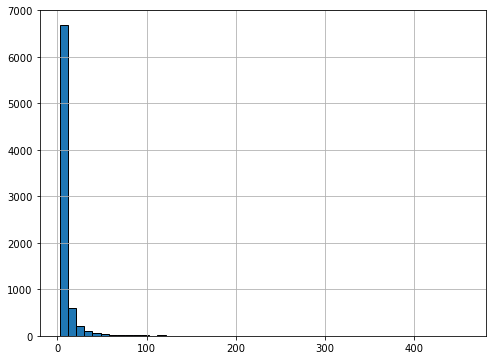

In [34]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['review_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

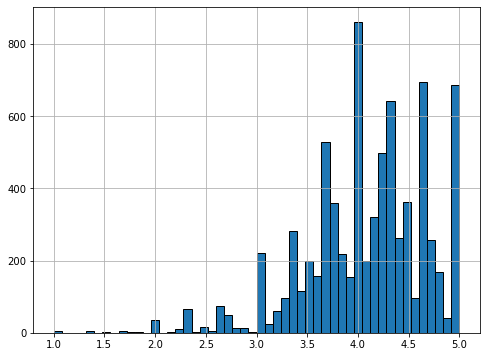

In [35]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['review_score'].hist(bins=50)

## Collaborative Filtering
Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item. Collaborative filtering has two sub-categories that are generally called:
- Model-based approaches. These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions:
    1. SVD;

- Memory based:
    1. A basic collaborative filtering algorithm. (<b>KNNBasic model</b>)
    2. A basic collaborative filtering algorithm, taking into account the mean ratings of each user. (<b>KNNWithMeans model</b>)
    3. A basic collaborative filtering algorithm, taking into account the z-score normalization of each user (<b>KNNWithZScore model</b>)
    4. A basic collaborative filtering algorithm taking into account a baseline rating. (<b>KNNBaseline model</b>)

In [38]:
from surprise import SVD,  SlopeOne
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [39]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [40]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [41]:
# Defining bsl_options and sim_options for all methods , 
# more info https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5 }
sim_options={'name': 'pearson_baseline', 'user_based': False}

In [42]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering

algo_KNNWithMeans = KNNWithMeans(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNWithMeans = algo_KNNWithMeans.fit(trainset).test(testset)
rmse_KNNWithMeans = accuracy.rmse(predictions_KNNWithMeans)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3458


In [43]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo_KNNBasic = KNNBasic(k=5,sim_options = sim_options , bsl_options = bsl_options)
predictions_KNNBasic = algo_KNNBasic.fit(trainset).test(testset)
rmse_KNNBasic = accuracy.rmse(predictions_KNNBasic)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.3421


### Model-based collaborative filtering system

In [44]:
# Matrix Factorization-based SVD
from surprise import SVD

algo_SVD = SVD()
predictions_SVD = algo_SVD.fit(trainset).test(testset)
rmse_SVD = accuracy.rmse(predictions_SVD)

RMSE: 1.3558


### Comparing RMSE for Modles

In [45]:
print("Item-based Model : Test Set")
print("KNNBasic Model" , rmse_KNNBasic)
print("KNNWithMeans Model" , rmse_KNNWithMeans)

Item-based Model : Test Set
KNNBasic Model 1.342125033135573
KNNWithMeans Model 1.345832387175424


In [46]:
print("Model-based Model : Test Set")
print("SVD Model" , rmse_SVD)

Model-based Model : Test Set
SVD Model 1.3558227498432434


 Prediction List for a Particular User in this section the list of recommendations are shown for chosen user.
Use different IDs to see the recommendation for each of the methods above

In [47]:
#Creating list of all unique users and products

all_user_ids = list(new_df['customer_id'].unique())

#all_user_ids[:10]

all_products = list(new_df['product_id'].unique())

all_products[:15]

['87285b34884572647811a353c7ac498a',
 '595fac2a385ac33a80bd5114aec74eb8',
 'aa4383b373c6aca5d8797843e5594415',
 'd0b61bfb1de832b15ba9d266ca96e5b0',
 '65266b2da20d04dbe00c5c2d3bb7859e',
 '060cb19345d90064d1015407193c233d',
 '4520766ec412348b8d4caa5e8a18c464',
 '9a78fb9862b10749a117f7fc3c31f051',
 '08574b074924071f4e201e151b152b4e',
 'f7e0fa615b386bc9a8b9eb52bc1fff76',
 '10adb53d8faa890ca7c2f0cbcb68d777',
 '72d3bf1d3a790f8874096fcf860e3eff',
 'a47295965bd091207681b541b26e40a5',
 'cce679660c66e6fbd5c8091dfd29e9cd',
 'c35498fbb4358837ae16850f50c3fd22']

In [48]:
#the number of all unique users present in the dataset
len(all_user_ids)

69008

In [49]:
user_index = 100

uid = all_user_ids[user_index]

In [50]:
#choosen user ID
print("User choosen to generate recommendation list is " + str(uid))

User choosen to generate recommendation list is fedcdc6c89d60699c967422066834f65


In [51]:
# method KNNBasic
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNBasic.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNBasic.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNBasic.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)

recommendedation_list=pd.DataFrame(recommendedation_lits,columns=['recommended product'])

print("Recommended items for user " + str(uid) + " by KNNBasic \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
595fac2a385ac33a80bd5114aec74eb8
ee4007b2b6a389f76918b093ff7b6523
Recommended items for user fedcdc6c89d60699c967422066834f65 by KNNBasic 
 ['cd974e9271f5d14639a1af02929a8be2', 'aca2eb7d00ea1a7b8ebd4e68314663af', 'a0b7d5a992ccda646f2d34e418fff5a0', '422879e10f46682990de24d770e7f83d', '4b7690d7352318e41ae9594241ac4789', 'fb01a5fc09b9b9563c2ee41a22f07d54', '4a0c2a56e65c941a0bb9874c47dd66d8', 'bce474cc95b6e77657e10939b0b4248c', '7c898e0b8ea203dd94ba846627fc34d1', 'c4baedd846ed09b85f78a781b522f126', 'd465fef4e52e46bc9e04996b37789bbd', 'a5341e3f8155dbb3e62323d3ea289729', '98190f6a2c3253d07ca86525bb238162', 'fab8297a9d2e7e1e756998675831f7e9']


In [52]:
# method KNNWithMeans
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_KNNWithMeans.trainset.to_raw_iid(items))



#getting K Neareset Neighbors for first item purchased by the choosen user
KNN_Product = algo_KNNWithMeans.get_neighbors(items_purchased[0][0], 15)

recommendedation_lits = []
for product_iid in KNN_Product:
    if not product_iid in items_purchased[0]: #user already has purchased the item
        purchased_item = algo_KNNWithMeans.trainset.to_raw_iid(product_iid)
        recommendedation_lits.append(purchased_item)
print("Recommended items for user " + str(uid) + " by KNNWithMeans \n"  , recommendedation_lits)    

Choosen User has purchased the following items 
595fac2a385ac33a80bd5114aec74eb8
ee4007b2b6a389f76918b093ff7b6523
Recommended items for user fedcdc6c89d60699c967422066834f65 by KNNWithMeans 
 ['cd974e9271f5d14639a1af02929a8be2', 'aca2eb7d00ea1a7b8ebd4e68314663af', 'a0b7d5a992ccda646f2d34e418fff5a0', '422879e10f46682990de24d770e7f83d', '4b7690d7352318e41ae9594241ac4789', 'fb01a5fc09b9b9563c2ee41a22f07d54', '4a0c2a56e65c941a0bb9874c47dd66d8', 'bce474cc95b6e77657e10939b0b4248c', '7c898e0b8ea203dd94ba846627fc34d1', 'c4baedd846ed09b85f78a781b522f126', 'd465fef4e52e46bc9e04996b37789bbd', 'a5341e3f8155dbb3e62323d3ea289729', '98190f6a2c3253d07ca86525bb238162', 'fab8297a9d2e7e1e756998675831f7e9']


In [53]:
# method SVD
# list of items already purchased by user choosen above

items_purchased = trainset.ur[trainset.to_inner_uid(uid)]


print("Choosen User has purchased the following items ")
for items in items_purchased[0]: 
    print(algo_SVD.trainset.to_raw_iid(items))


Recommended_list = []

UserID = all_user_ids[user_index]

for product_id in all_products:
    pred = algo_SVD.predict(UserID,  product_id, r_ui=4, verbose=True)
    Recommended_list.append(pred)

    print("Recommended items for user " + str(uid) + " by SVD \n")

pred[:5]

Choosen User has purchased the following items 
595fac2a385ac33a80bd5114aec74eb8
ee4007b2b6a389f76918b093ff7b6523
user: fedcdc6c89d60699c967422066834f65 item: 87285b34884572647811a353c7ac498a r_ui = 4.00   est = 4.52   {'was_impossible': False}
Recommended items for user fedcdc6c89d60699c967422066834f65 by SVD 

user: fedcdc6c89d60699c967422066834f65 item: 595fac2a385ac33a80bd5114aec74eb8 r_ui = 4.00   est = 4.31   {'was_impossible': False}
Recommended items for user fedcdc6c89d60699c967422066834f65 by SVD 

user: fedcdc6c89d60699c967422066834f65 item: aa4383b373c6aca5d8797843e5594415 r_ui = 4.00   est = 4.01   {'was_impossible': False}
Recommended items for user fedcdc6c89d60699c967422066834f65 by SVD 

user: fedcdc6c89d60699c967422066834f65 item: d0b61bfb1de832b15ba9d266ca96e5b0 r_ui = 4.00   est = 4.26   {'was_impossible': False}
Recommended items for user fedcdc6c89d60699c967422066834f65 by SVD 

user: fedcdc6c89d60699c967422066834f65 item: 65266b2da20d04dbe00c5c2d3bb7859e r_ui = 4

('fedcdc6c89d60699c967422066834f65',
 'c8078bb7927143cdb008e3563230ca61',
 4,
 3.9578515559329435,
 {'was_impossible': False})

## Additional Analysis of the predictions

Now, we analyse the predictions of each model. To compare each model prediction a Predictions Dataframe needs to be created, the following functions are helpers:

In [54]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0

In [55]:
#Predictions for KNNBasic

df_predictions_KNNBasic = pd.DataFrame(predictions_KNNBasic, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNBasic['Iu'] = df_predictions_KNNBasic.uid.apply(get_Iu)
df_predictions_KNNBasic['Ui'] = df_predictions_KNNBasic.iid.apply(get_Ui)
df_predictions_KNNBasic['err'] = abs(df_predictions_KNNBasic.est - df_predictions_KNNBasic.rui)

In [70]:
df_predictions_KNNBasic

,uid,iid,rui,est,details,Iu,Ui,err
0,f9c4ef88e2f5e4ec187a3258553b679f,51f876eb62be778c757503cf7f8a3b74,4.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,16,0.081012
1,8cf1fb406945ccc459ea681056123b03,9b07e5a3113ca2345341e0cda29e4eb7,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,0,0.918988
2,a551e0db88458b42f4f6a76ecdb114dd,fa4e8255202fd921350a6fc716710dae,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,10,0.918988
3,ac8cc4a85ca3d9075ef451162d432d05,f80152c36d5600aabf3bf06bc8dddf8e,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,0,0.918988
4,94633c1543af42cafa3898371bc650f8,79bd832302282bb4f305c5947c2bee1a,1.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,4,3.081012
...,...,...,...,...,...,...,...,...
21199,cf4ce219ea3ba8dfe2b2b173c8f5d68f,0d85c435fd60b277ffb9e9b0f88f927a,3.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,44,1.081012
21200,297e4d3a79ef71ff35edde593ed36034,c8f47078677998140708abd3c0aa15ec,3.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,5,1.081012
21201,a1961b2577837c6163adfd9e7c25e5a6,53b36df67ebb7c41585e8d54d6772e08,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,207,0.918988
21202,faa60b8bd84596f71cefc77af1406537,4c2394abfbac7ff59ec7a420918562fa,2.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,83,2.081012


In [57]:
best_predictions = df_predictions_KNNBasic.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNBasic.sort_values(by='err')[-10:]

In [68]:
# remove # for the best predictions
#best_predictions

In [59]:
# remove # for the worst predictions
#worst_predictions 

In [60]:
print("\nTotal no of ratings :",df_predictions_KNNBasic.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNBasic.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNBasic.iid)))


Total no of ratings : 21204
Total No of Users   : 21054
Total No of products  : 6359


In [61]:
#Predictions for KNNWithMeans

df_predictions_KNNWithMeans = pd.DataFrame(predictions_KNNWithMeans, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_KNNWithMeans['Iu'] = df_predictions_KNNWithMeans.uid.apply(get_Iu)
df_predictions_KNNWithMeans['Ui'] = df_predictions_KNNWithMeans.iid.apply(get_Ui)
df_predictions_KNNWithMeans['err'] = abs(df_predictions_KNNWithMeans.est - df_predictions_KNNWithMeans.rui)

In [62]:
df_predictions_KNNWithMeans

,uid,iid,rui,est,details,Iu,Ui,err
0,f9c4ef88e2f5e4ec187a3258553b679f,51f876eb62be778c757503cf7f8a3b74,4.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,16,0.081012
1,8cf1fb406945ccc459ea681056123b03,9b07e5a3113ca2345341e0cda29e4eb7,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,0,0.918988
2,a551e0db88458b42f4f6a76ecdb114dd,fa4e8255202fd921350a6fc716710dae,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,10,0.918988
3,ac8cc4a85ca3d9075ef451162d432d05,f80152c36d5600aabf3bf06bc8dddf8e,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,0,0.918988
4,94633c1543af42cafa3898371bc650f8,79bd832302282bb4f305c5947c2bee1a,1.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,4,3.081012
...,...,...,...,...,...,...,...,...
21199,cf4ce219ea3ba8dfe2b2b173c8f5d68f,0d85c435fd60b277ffb9e9b0f88f927a,3.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,44,1.081012
21200,297e4d3a79ef71ff35edde593ed36034,c8f47078677998140708abd3c0aa15ec,3.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,5,1.081012
21201,a1961b2577837c6163adfd9e7c25e5a6,53b36df67ebb7c41585e8d54d6772e08,5.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,207,0.918988
21202,faa60b8bd84596f71cefc77af1406537,4c2394abfbac7ff59ec7a420918562fa,2.0,4.081012,"{'was_impossible': True, 'reason': 'User and/o...",0,83,2.081012


In [63]:
best_predictions = df_predictions_KNNWithMeans.sort_values(by='err')[:10]
worst_predictions = df_predictions_KNNWithMeans.sort_values(by='err')[-10:]

In [64]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
9387,eaf673c8640de260cb58679e0e159cb4,ad4b5def91ac7c575dbdf65b5be311f4,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,6,0.0
15608,d13a5023cf828d8ca1277f90ca59e8e7,cb61a9727a2f74ec0c80652f4d62e812,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,2,0.0
20294,e05514718390ea5c5de170c243b30fad,5215505db2113a032810c3644c346a38,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,6,0.0
6515,9a603a2b22060e5a6a1120fba32492e3,6f57ca539fb6b20b79a272e17194d9c9,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,2,0.0
18550,035da1211e1f631ab58ceb5e614d3bd6,e4bc98f06b9893b763bb17a152219b87,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,4,0.0
3123,2dd8d26839864f021bc1ef8a05091680,ad0a798e7941f3a5a2fb8139cb62ad78,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,8,0.0
16119,885ba72f5da34cb4737e67487ade6e6c,3cc4b421c1f28dd22e86fc4aaafb600e,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,7,0.0
17994,a4753a09e2dd635834e03369a218a718,98d61056e0568ba048e5d78038790e77,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,28,0.0
5242,2bbb7f863b68ba0f0e2bc78ad1a6a902,6dae4e6bc334685708571a48aa41d437,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",1,3,0.0
18630,2989ce8ae64417334433bc6188dc8427,4d0ec1e9b95fb62f9a1fbe21808bf3b1,4.0,4.0,"{'actual_k': 0, 'was_impossible': False}",1,10,0.0


In [67]:
# remove # for the worst predictions
#worst_predictions

In [66]:
print("\nTotal no of ratings :",df_predictions_KNNWithMeans.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_KNNWithMeans.uid)))
print("Total No of products  :", len(np.unique(df_predictions_KNNWithMeans.iid)))


Total no of ratings : 21204
Total No of Users   : 21054
Total No of products  : 6359


In [71]:
#Predictions for SVD

df_predictions_SVD = pd.DataFrame(predictions_SVD, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions_SVD['Iu'] = df_predictions_SVD.uid.apply(get_Iu)
df_predictions_SVD['Ui'] = df_predictions_SVD.iid.apply(get_Ui)
df_predictions_SVD['err'] = abs(df_predictions_SVD.est - df_predictions_SVD.rui)

df_predictions_SVD

,uid,iid,rui,est,details,Iu,Ui,err
0,f9c4ef88e2f5e4ec187a3258553b679f,51f876eb62be778c757503cf7f8a3b74,4.0,4.032110,{'was_impossible': False},0,16,0.032110
1,8cf1fb406945ccc459ea681056123b03,9b07e5a3113ca2345341e0cda29e4eb7,5.0,4.081012,{'was_impossible': False},0,0,0.918988
2,a551e0db88458b42f4f6a76ecdb114dd,fa4e8255202fd921350a6fc716710dae,5.0,3.809406,{'was_impossible': False},0,10,1.190594
3,ac8cc4a85ca3d9075ef451162d432d05,f80152c36d5600aabf3bf06bc8dddf8e,5.0,4.081012,{'was_impossible': False},0,0,0.918988
4,94633c1543af42cafa3898371bc650f8,79bd832302282bb4f305c5947c2bee1a,1.0,3.872427,{'was_impossible': False},0,4,2.872427
...,...,...,...,...,...,...,...,...
21199,cf4ce219ea3ba8dfe2b2b173c8f5d68f,0d85c435fd60b277ffb9e9b0f88f927a,3.0,3.824799,{'was_impossible': False},0,44,0.824799
21200,297e4d3a79ef71ff35edde593ed36034,c8f47078677998140708abd3c0aa15ec,3.0,3.911327,{'was_impossible': False},0,5,0.911327
21201,a1961b2577837c6163adfd9e7c25e5a6,53b36df67ebb7c41585e8d54d6772e08,5.0,4.022027,{'was_impossible': False},0,207,0.977973
21202,faa60b8bd84596f71cefc77af1406537,4c2394abfbac7ff59ec7a420918562fa,2.0,4.154549,{'was_impossible': False},0,83,2.154549


In [72]:
best_predictions = df_predictions_SVD.sort_values(by='err')[:10]
worst_predictions = df_predictions_SVD.sort_values(by='err')[-10:]

In [73]:
# remove # for the best predictions
#best_predictions

In [74]:
# remove # for the worst predictions
#worst_predictions

In [75]:
print("\nTotal no of ratings :",df_predictions_SVD.shape[0])
print("Total No of Users   :", len(np.unique(df_predictions_SVD.uid)))
print("Total No of products  :", len(np.unique(df_predictions_SVD.iid)))


Total no of ratings : 21204
Total No of Users   : 21054
Total No of products  : 6359
